<a href="https://colab.research.google.com/github/NID123-CH/DSR-40/blob/main/DSR_40_Prob_Models_%26_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 1:**

**Maritime Logistics Probabilistic Model Consider a directed graph model for predicting successful cargo delivery in a maritime logistics network:**

W: Weather conditions (1: Favorable, 2: Moderate, 3: Severe)
P: Port congestion (1: Low, 2: Medium, 3: High)
S: Ship maintenance status (1: Excellent, 2: Average, 3: Poor)
D: Delivery outcome (1: On-time, 2: Delayed, 3: Significantly delayed)\

The directed graph structure is as follows:
W -> P
W -> D
P -> D
S -> D
Given the following probabilities:
P(W = 1) = 0.5, P(W = 2) = 0.3, P(W = 3) = 0.2
P(S = 1) = 0.6, P(S = 2) = 0.3, P(S = 3) = 0.1

P(P = 1 | W = 1) = 0.7, P(P = 2 | W = 1) = 0.2, P(P = 3 | W = 1) = 0.1
P(P = 1 | W = 2) = 0.3, P(P = 2 | W = 2) = 0.5, P(P = 3 | W = 2) = 0.2
P(P = 1 | W = 3) = 0.1, P(P = 2 | W = 3) = 0.3, P(P = 3 | W = 3) = 0.6

P(D = 1 | W = 1, P = 1, S = 1) = 0.9, P(D = 2 | W = 1, P = 1, S = 1) = 0.1, P(D = 3 | W = 1, P = 1, S = 1) = 0.0
P(D = 1 | W = 2, P = 2, S = 2) = 0.5, P(D = 2 | W = 2, P = 2, S = 2) = 0.4, P(D = 3 | W = 2, P = 2, S = 2) = 0.1
P(D = 1 | W = 3, P = 3, S = 3) = 0.1, P(D = 2 | W = 3, P = 3, S = 3) = 0.3, P(D = 3 | W = 3, P = 3, S = 3) = 0.6

Tasks:\

Visualize the directed graph for this maritime logistics model.
Calculate P(D = 1 | W = 1, S = 1), the probability of on-time delivery given favorable weather and excellent ship maintenance.
Discuss how this model could be used to improve maritime logistics planning.**bold text**

<ipython-input-1-95dc3e5342da>:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


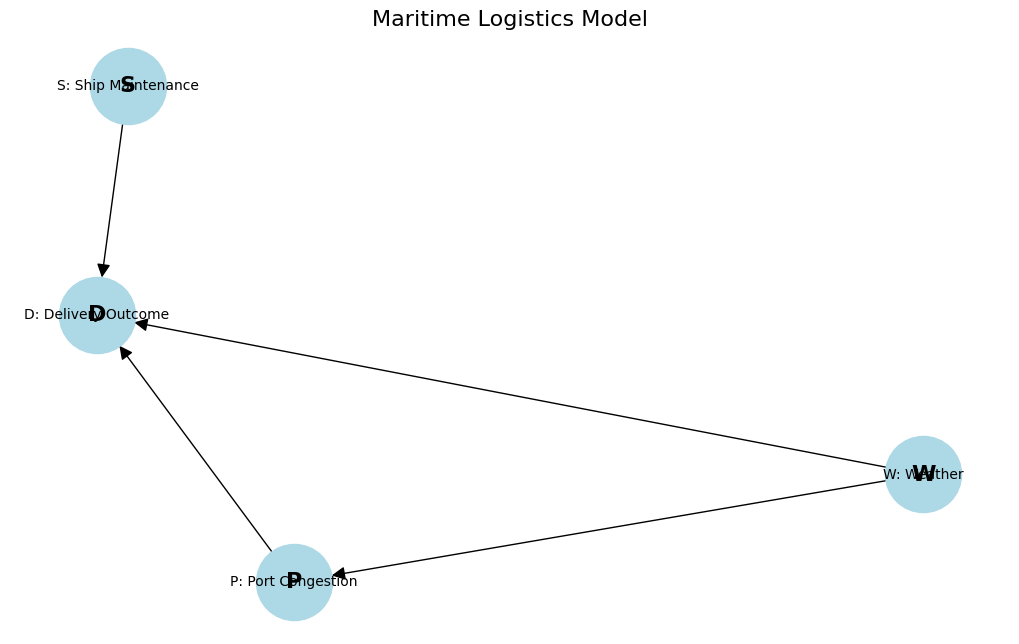

P(D = 1 | W = 1, S = 1) = 0.7290

Explanation:
We use the law of total probability:
P(D = 1 | W = 1, S = 1) = P(D = 1 | W = 1, P = 1, S = 1) * P(P = 1 | W = 1) +
                          P(D = 1 | W = 1, P = 2, S = 1) * P(P = 2 | W = 1) +
                          P(D = 1 | W = 1, P = 3, S = 1) * P(P = 3 | W = 1)
                        = 0.9000 * 0.7000 +
                        = 0.3300 * 0.2000 +
                        = 0.3300 * 0.1000 +
                        = 0.7290


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create the directed graph
G = nx.DiGraph()
G.add_edges_from([('W', 'P'), ('W', 'D'), ('P', 'D'), ('S', 'D')])

# Visualize the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=3000, arrowsize=20, font_size=16, font_weight='bold')

node_labels = {
    'W': 'W: Weather',
    'P': 'P: Port Congestion',
    'S': 'S: Ship Maintenance',
    'D': 'D: Delivery Outcome'
}

nx.draw_networkx_labels(G, pos, node_labels, font_size=10)
plt.title("Maritime Logistics Model", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Calculate P(D = 1 | W = 1, S = 1)
def P_P_given_W(w):
    if w == 1:
        return [0.7, 0.2, 0.1]
    elif w == 2:
        return [0.3, 0.5, 0.2]
    else:  # w == 3
        return [0.1, 0.3, 0.6]

def P_D_given_WPS(w, p, s):
    if w == 1 and p == 1 and s == 1:
        return [0.9, 0.1, 0.0]
    elif w == 2 and p == 2 and s == 2:
        return [0.5, 0.4, 0.1]
    elif w == 3 and p == 3 and s == 3:
        return [0.1, 0.3, 0.6]
    else:
        return [0.33, 0.33, 0.34]  # Assume roughly equal probability for unspecified cases

# P(D = 1 | W = 1, S = 1) = Σp P(D = 1 | W = 1, P = p, S = 1) * P(P = p | W = 1)
P_P_given_W1 = P_P_given_W(1)
P_D1_given_W1S1 = sum([P_D_given_WPS(1, p, 1)[0] * P_P_given_W1[p-1] for p in [1, 2, 3]])

print(f"P(D = 1 | W = 1, S = 1) = {P_D1_given_W1S1:.4f}")

# Explanation of the calculation
print("\nExplanation:")
print("We use the law of total probability:")
print("P(D = 1 | W = 1, S = 1) = P(D = 1 | W = 1, P = 1, S = 1) * P(P = 1 | W = 1) +")
print("                          P(D = 1 | W = 1, P = 2, S = 1) * P(P = 2 | W = 1) +")
print("                          P(D = 1 | W = 1, P = 3, S = 1) * P(P = 3 | W = 1)")
for p in [1, 2, 3]:
    print(f"                        = {P_D_given_WPS(1, p, 1)[0]:.4f} * {P_P_given_W1[p-1]:.4f} +")
print(f"                        = {P_D1_given_W1S1:.4f}")

**Exercise 2: Weather Prediction using Markov Chains**

Consider a simple weather model for a particular location with three possible states:

Sunny (S)\
Cloudy (C)\
Rainy (R)
The weather follows a Markov chain model with the following transition matrix:

         To: S    C    R\
From: S [0.7, 0.2, 0.1]\
      C [0.3, 0.4, 0.3]\
      R [0.2, 0.3, 0.5]
For example, if it's Sunny today, there's a 70% chance it will be Sunny tomorrow,
20% chance it will be Cloudy, and 10% chance it will be Rainy.

Tasks:\

Visualize the Markov chain as a directed graph.\
If it's Sunny today, what's the probability it will be Rainy two days from now?\
Calculate the steady-state probabilities for each weather state.\
Simulate the weather for the next 30 days, starting from a Sunny day.

<ipython-input-2-403e06e167f7>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


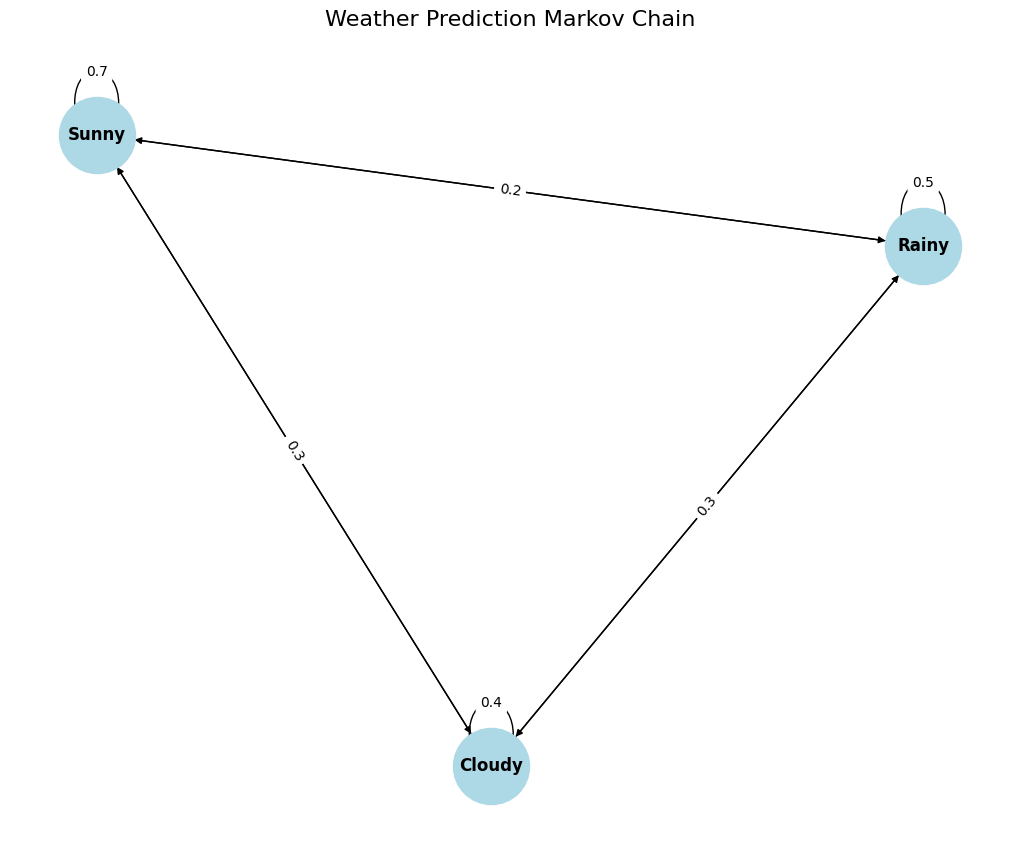

Probability of Rainy two days from Sunny: 0.1800

Steady-state probabilities:
Sunny: 0.4565
Cloudy: 0.2826
Rainy: 0.2609

Simulated weather for 30 days:
Sunny -> Sunny -> Rainy -> Rainy -> Rainy -> Sunny -> Sunny -> Sunny -> Cloudy -> Cloudy -> Rainy -> Sunny -> Rainy -> Rainy -> Cloudy -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Sunny -> Cloudy -> Sunny -> Sunny -> Sunny


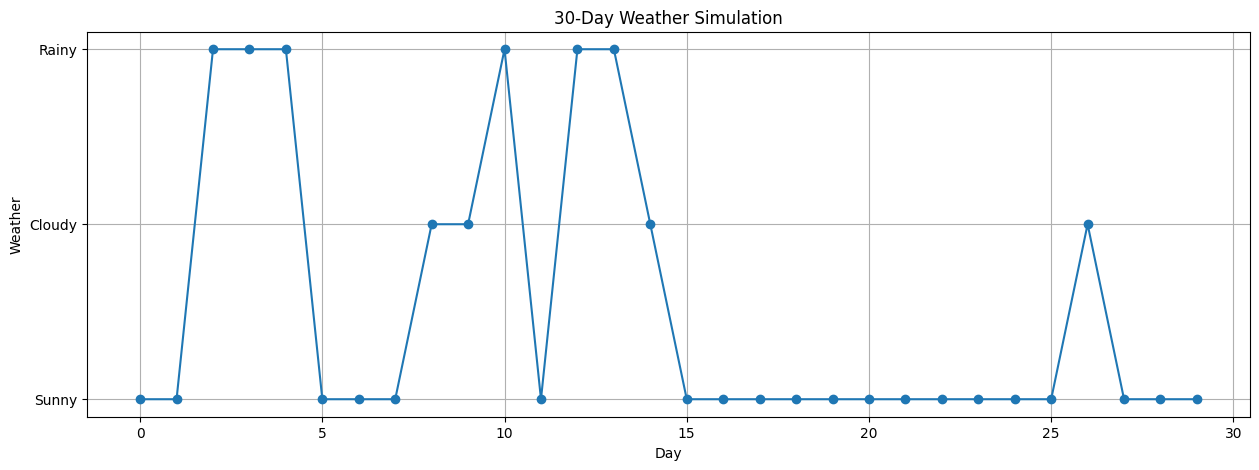

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the transition matrix
P = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.4, 0.3],
    [0.2, 0.3, 0.5]
])

# Task 1: Visualize the Markov chain
def visualize_markov_chain(P):
    G = nx.DiGraph()
    states = ['Sunny', 'Cloudy', 'Rainy']
    for i, state in enumerate(states):
        G.add_node(state)
        for j, next_state in enumerate(states):
            if P[i, j] > 0:
                G.add_edge(state, next_state, weight=P[i, j], label=f'{P[i, j]:.1f}')

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=3000, font_size=12, font_weight='bold')

    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Weather Prediction Markov Chain", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_markov_chain(P)

# Task 2: Probability of Rainy two days from Sunny
prob_rainy_two_days = np.dot(np.dot([1, 0, 0], P), P)[2]
print(f"Probability of Rainy two days from Sunny: {prob_rainy_two_days:.4f}")

# Task 3: Calculate steady-state probabilities
def steady_state(P):
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    stationary = eigenvectors[:, np.isclose(eigenvalues, 1)].real
    stationary = stationary / np.sum(stationary)
    return stationary.flatten()

steady_probs = steady_state(P)
states = ['Sunny', 'Cloudy', 'Rainy']
print("\nSteady-state probabilities:")
for state, prob in zip(states, steady_probs):
    print(f"{state}: {prob:.4f}")

# Task 4: Simulate weather for 30 days
def simulate_weather(P, days, start_state):
    states = ['Sunny', 'Cloudy', 'Rainy']
    current_state = start_state
    simulation = [states[current_state]]
    for _ in range(days - 1):
        current_state = np.random.choice(3, p=P[current_state])
        simulation.append(states[current_state])
    return simulation

np.random.seed(42)  # for reproducibility
simulation = simulate_weather(P, 30, 0)  # 0 represents Sunny start state
print("\nSimulated weather for 30 days:")
print(' -> '.join(simulation))

# Visualize the simulation
plt.figure(figsize=(15, 5))
plt.plot(range(30), [states.index(day) for day in simulation], marker='o')
plt.yticks(range(3), states)
plt.xlabel('Day')
plt.ylabel('Weather')
plt.title('30-Day Weather Simulation')
plt.grid(True)
plt.show()


***Central Limit Theorem***

Implement a python function called central_limit_theorem that accepts three arguments: population_data, sample_size, and num_of_samples. Your function should simulate the central limit theorem. The function should draw the specified number of samples of the given size from the population data, calculate the means of these samples, and return a list of these means.

Test this function using a randomly generated population data. Plot the distribution of sample means and the mean of the population.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Implement your function here
def central_limit_theorem(population_data, sample_size, num_of_samples):
    sample_means = []
    for _ in range(num_of_samples):
        sample = np.random.choice(population_data, sample_size)
        sample_means.append(np.mean(sample))
    return sample_means

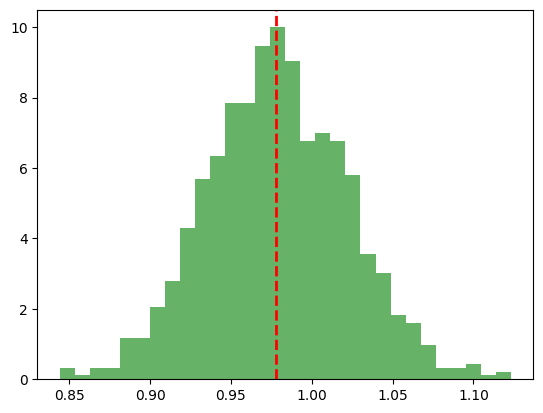

In [5]:
# Test the function

population_data = np.random.exponential(scale=1.0, size=10000)
sample_means = central_limit_theorem(population_data, sample_size=500, num_of_samples=1000)

# Plotting
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
plt.axvline(np.mean(population_data), color='r', linestyle='dashed', linewidth=2)
plt.show()

In [6]:
population_data

array([0.04756385, 0.93533302, 0.18696125, ..., 2.43303122, 2.23302115,
       1.06103084])

**Exercise 3**

How does the confidence interval of variance look like?

In [7]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Function to calculate confidence interval for variance
def confidence_interval_variance(data, confidence):
    n = len(data)
    var = np.var(data, ddof=1)  # sample variance with Bessel's correction
    chi2_lower = scipy.stats.chi2.ppf((1 - confidence) / 2, df=n-1)
    chi2_upper = scipy.stats.chi2.ppf((1 + confidence) / 2, df=n-1)
    lower = (n - 1) * var / chi2_upper
    upper = (n - 1) * var / chi2_lower
    return lower, upper

# Generate some random data
data = np.random.normal(loc=10, scale=2, size=1000)

# Calculate the confidence interval for the variance
confidence = 0.95
conf_interval_variance = confidence_interval_variance(data, confidence)
print(f"The {confidence*100}% confidence interval for variance is {conf_interval_variance}")

The 95.0% confidence interval for variance is (3.533036048191957, 4.210730148566389)


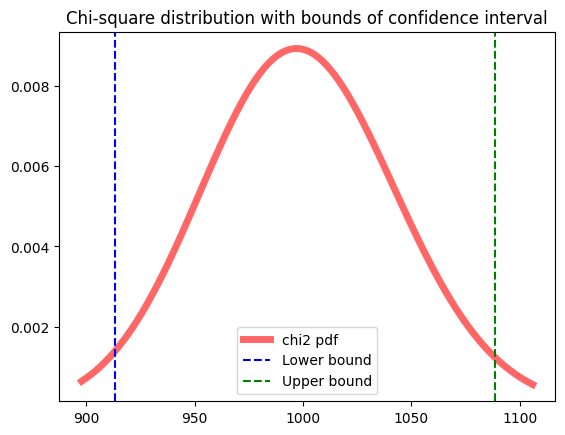

The 95.0% confidence interval for variance is (3.80, 4.53)


In [8]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Function to calculate confidence interval for variance
def confidence_interval_variance(data, confidence):
    n = len(data)
    var = np.var(data, ddof=1)  # sample variance with Bessel's correction
    chi2_lower = scipy.stats.chi2.ppf((1 - confidence) / 2, df=n-1)
    chi2_upper = scipy.stats.chi2.ppf((1 + confidence) / 2, df=n-1)
    lower = (n - 1) * var / chi2_upper
    upper = (n - 1) * var / chi2_lower
    return lower, upper, chi2_lower, chi2_upper

# Generate some random data
data = np.random.normal(loc=10, scale=2, size=1000)

# Calculate the confidence interval for the variance
confidence = 0.95
lower, upper, chi2_lower, chi2_upper = confidence_interval_variance(data, confidence)

# Plot chi-square distribution
df = len(data) - 1
x = np.linspace(scipy.stats.chi2.ppf(0.01, df), scipy.stats.chi2.ppf(0.99, df), 100)
plt.plot(x, scipy.stats.chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')

# Plot confidence intervals
plt.axvline(x=chi2_lower, color='blue', linestyle='--', label='Lower bound')
plt.axvline(x=chi2_upper, color='green', linestyle='--', label='Upper bound')

plt.title('Chi-square distribution with bounds of confidence interval')
plt.legend()
plt.show()

print(f"The {confidence*100}% confidence interval for variance is ({lower:.2f}, {upper:.2f})")

**Exercise 4**

Implement a python function called bootstrap that accepts three arguments: data, num_samples, and statistic. Your function should perform bootstrap sampling on the data (resampling with replacement) the specified number of times, applying the provided statistical function to each sample, and return an array of the calculated statistic for each sample.

Test this function using a randomly generated data and numpy's mean as the statistic. Calculate and print the mean and standard deviation of the bootstrap samples' statistic.

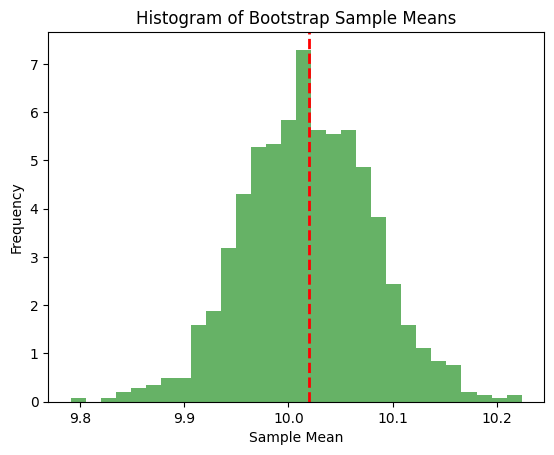

Bootstrap samples statistic mean: 10.02
Bootstrap samples statistic std dev: 0.06


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform bootstrap sampling
def bootstrap(data, num_samples, statistic):
    bootstrap_samples_stat = []
    for _ in range(num_samples):
        sample = np.random.choice(data, len(data), replace=True)
        bootstrap_samples_stat.append(statistic(sample))
    return np.array(bootstrap_samples_stat)

# Generate some random data
data = np.random.normal(loc=10, scale=2, size=1000)

# Perform bootstrapping and calculate statistics for each sample
bootstrap_samples_stat = bootstrap(data, num_samples=1000, statistic=np.mean)

# Plot histogram of bootstrap sample statistics
plt.hist(bootstrap_samples_stat, bins=30, density=True, alpha=0.6, color='g')

# Add line for the mean of the bootstrap sample statistics
plt.axvline(np.mean(bootstrap_samples_stat), color='r', linestyle='dashed', linewidth=2)

# Show the plot
plt.title("Histogram of Bootstrap Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

print(f"Bootstrap samples statistic mean: {np.mean(bootstrap_samples_stat):.2f}")
print(f"Bootstrap samples statistic std dev: {np.std(bootstrap_samples_stat):.2f}")

**Exercise**
GreenGrow, an eco-friendly gardening supply company, wants to assess customer satisfaction with their new line of organic fertilizers. They've conducted a survey asking customers to rate their satisfaction on a scale of 1 to 10, with 10 being the highest satisfaction level. Survey Results:

Number of respondents: 200 Mean satisfaction score: 7.8 Sample standard deviation: 1.5

**Question:**
As GreenGrow's data analyst, you've been asked to provide a 95% confidence interval for the true mean satisfaction score of all their customers. The marketing team will use this information to decide whether to expand the organic fertilizer line.

Calculate the 95% confidence interval for the true mean satisfaction score. Interpret the results for the marketing team. What can you confidently say about the overall customer satisfaction? The marketing team has set a benchmark: they will expand the product line if they are 95% confident that the true mean satisfaction score is above 7.5. Based on your calculation, what recommendation would you give to the team?

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# GreenGrow survey data
sample_mean = 7.8
sample_std = 1.5
sample_size = 200
confidence_level = 0.95

# Calculate confidence interval
z_score = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval: (7.59, 8.01)


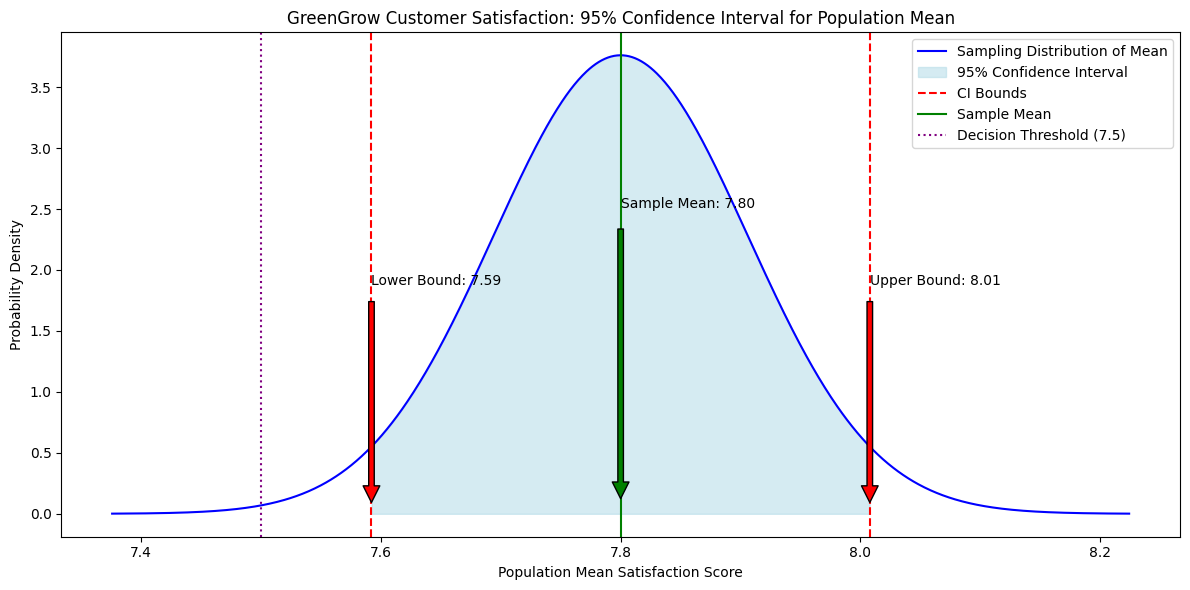

In [11]:
# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Create a range of x values for the sampling distribution of the mean
x = np.linspace(sample_mean - 4*sample_std/np.sqrt(sample_size),
                sample_mean + 4*sample_std/np.sqrt(sample_size), 1000)
y = stats.norm.pdf(x, sample_mean, sample_std/np.sqrt(sample_size))

# Plot the sampling distribution curve
ax.plot(x, y, 'b-', label='Sampling Distribution of Mean')

# Fill the area within the confidence interval
ax.fill_between(x, y, where=(x >= ci_lower) & (x <= ci_upper), color='lightblue', alpha=0.5, label='95% Confidence Interval')

# Add vertical lines for the confidence interval bounds
ax.axvline(ci_lower, color='r', linestyle='--', label='CI Bounds')
ax.axvline(ci_upper, color='r', linestyle='--')

# Add a vertical line for the sample mean
ax.axvline(sample_mean, color='g', linestyle='-', label='Sample Mean')

# Add a vertical line for the decision threshold
decision_threshold = 7.5
ax.axvline(decision_threshold, color='purple', linestyle=':', label='Decision Threshold (7.5)')

# Customize the plot
ax.set_title('GreenGrow Customer Satisfaction: 95% Confidence Interval for Population Mean')
ax.set_xlabel('Population Mean Satisfaction Score')
ax.set_ylabel('Probability Density')
ax.legend()

# Add annotations
ax.annotate(f'Lower Bound: {ci_lower:.2f}', xy=(ci_lower, 0), xytext=(ci_lower, max(y)/2),
            arrowprops=dict(facecolor='red', shrink=0.05))
ax.annotate(f'Upper Bound: {ci_upper:.2f}', xy=(ci_upper, 0), xytext=(ci_upper, max(y)/2),
            arrowprops=dict(facecolor='red', shrink=0.05))
ax.annotate(f'Sample Mean: {sample_mean:.2f}', xy=(sample_mean, 0), xytext=(sample_mean, max(y)/1.5),
            arrowprops=dict(facecolor='green', shrink=0.05))

plt.tight_layout()
plt.show()

In [12]:
# Interpretation
print("\nInterpretation:")
print(f"We are 95% confident that the true population mean satisfaction score falls between {ci_lower:.2f} and {ci_upper:.2f}.")
if ci_lower > decision_threshold:
    print("Recommendation: Expand the product line. We are 95% confident that the true population mean satisfaction score is above 7.5.")
elif ci_upper < decision_threshold:
    print("Recommendation: Do not expand the product line. We are 95% confident that the true population mean satisfaction score is below 7.5.")
else:
    print("Recommendation: Consider gathering more data. The decision threshold falls within the confidence interval, so we cannot be 95% confident about whether the true population mean is above or below 7.5.")


Interpretation:
We are 95% confident that the true population mean satisfaction score falls between 7.59 and 8.01.
Recommendation: Expand the product line. We are 95% confident that the true population mean satisfaction score is above 7.5.
